In [12]:
# import pandas into the environment
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import marketing.csv
marketing = pd.read_csv('../Dataset/marketing.csv')

### Calculating conversion rate

In this exercise, you will practice calculating conversion rate, which is often the first metric you'll want to calculate when evaluating how a marketing campaign performed.

On marketing teams, conversion rate is typically the most important metric. It is one of the best ways to determine how effective a marketing team was at gaining new customers.

As a reminder, conversion rate is the percentage of the users who saw our marketing assets and subsequently became subscribers.

The formula for conversion rate is:

$$
\frac{Number of people who convert}{Total number of people who we market to}
$$

In [4]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted']==True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


### Calculating retention rate

In this exercise, you will calculate the retention rate, or the number of remaining subscribers from the users who converted to your product. This can give you a sense of whether your marketing campaign converted subscribers who were actually interested in the product.

Conversion rate and retention rate function hand-in-hand; you could create a business with a high conversion rate by giving users a free trial, but have a low retention rate once users are charged for your services. This isn't inherently a bad thing, but it is important to provide your business stakeholders with insight into what percentage of users remain subscribers.

The formula for retention rate is:

$$
\frac{Number of people who remain subscribed}{Total number of people who converted}
$$

In [5]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained']==True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

66.8 %


### Comparing language conversion rate (I)

The marketing team wants to determine how effective the campaign was on converting English speakers.

In this exercise, you will isolate the data for English speakers and calculate the conversion rate much like in the previous exercises. Remember, the formula for conversion rate is:

$$
\frac{Number of people who convert}{Total number people who we market to}
$$

Once you have the conversion rate for English speakers, you can compare it to the overall conversion rate to gain a sense of how effective the marketing campaign was among this group compared to the overall population.

In [9]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


### Comparing language conversion rate (II)

Next, you want to look at the conversion rate by the language that the marketing asset was shown in. While many of your users speak English, some prefer another language. Let's check to make sure marketing material translated well across languages.

You can analyze metrics by specific demographics using .groupby(). Rather than looking at the overall conversion rate in the dataset, you instead group by language preference, which allows you to determine whether the marketing campaign was more effective in certain languages.

In [10]:
# Group by language_displayed and count unique users
total = marketing.groupby('language_displayed')['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True].groupby('language_displayed')['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


### Aggregating by date

The marketing team wants to know whether there is any difference in the conversion rate based on when in the month, your users saw an ad. In this exercise, you will practice .groupby() again, this time looking at how metrics have evolved.

In [11]:
# Group by date_served and count unique users
total = marketing.groupby('date_served')['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True].groupby('date_served')['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
1/1/18     0.099448
1/10/18    0.118694
1/11/18    0.080645
1/12/18    0.076412
1/13/18    0.084967
1/14/18    0.085246
1/15/18    0.113429
1/16/18    0.255155
1/17/18    0.219512
1/18/18    0.091195
1/19/18    0.059016
1/2/18     0.098930
1/20/18    0.067524
1/21/18    0.087336
1/22/18    0.123596
1/23/18    0.122093
1/24/18    0.115789
1/25/18    0.125000
1/26/18    0.090090
1/27/18    0.065625
1/28/18    0.062500
1/29/18    0.059561
1/3/18     0.103448
1/30/18    0.066246
1/31/18    0.052941
1/4/18     0.108359
1/5/18     0.125392
1/6/18     0.113636
1/7/18     0.141818
1/8/18     0.115385
1/9/18     0.125000
Name: user_id, dtype: float64


### Visualize conversion rate by language

When you calculated conversion rate by age group in the previous exercise, you printed out a DataFrame called language_conversion_rate containing your results. While this table provided useful information, it is much easier to compare relative conversion rates visually.

It is critical for data scientists to communicate results clearly to business stakeholders. A strong foundation in data visualization is a key aspect to conveying results, especially when engaging with people who are not as comfortable interpreting data on their own.

In this exercise, you will build upon the work you did to create language_conversion_rate by visualizing your results in a bar chart.

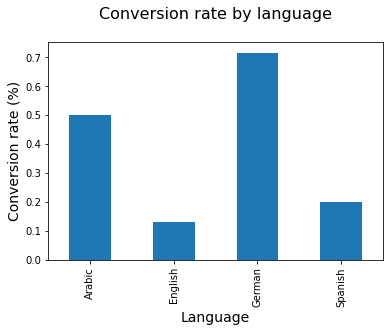

In [13]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind='bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

# Display the plot
plt.show()

### Creating daily conversion rate DataFrame

To understand trends over time, you will create a new DataFrame that includes the conversion rate each day. You will follow essentially the same steps as before when you calculated the overall conversion rate, this time also grouping by the date a user subscribed.

Looking at the daily conversion rate is crucial to contextualize whether the conversion rate on a particular day was good or bad. Additionally, looking at conversion rate over time can help to surface trends such as a conversion rate that appears to be going down over time. These kinds of trends are crucial to identify for your marketing stakeholders as early as possible.

In [14]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rates = subscribers/total

### Setting up our data to visualize daily conversion

When you want to understand how your campaign performed, it is essential to look at how key metrics changed throughout the campaign. Your key metrics can help you catch problems that may have happened during the campaign, such as a bug in the checkout system that led to a dip in conversion toward the end of your campaign. Metrics over time can also surface trends like gaining more subscribers over the weekends or on specific holidays.

In this exercise, you will build upon the daily conversion rate Series daily_conversion_rates you built in a previous exercise. Before you can begin visualizing, you need to transform your data into an easier format to use with pandas and matplotlib.

In [15]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index())

# Rename columns
daily_conversion_rate.columns = ['date_served', 
                              'conversion_rate']

In [ ]:
daily_conversion_rate.col

### Visualize daily conversion rate

Now that your formatted the data into a more manageable format for visualization, you will proceed to create a line chart. Strong visualization skills are crucial for a data scientist because it will allow you and your marketing stakeholders to derive deeper insights from the data. In this case, creating a line plot will make it much easier to notice peaks and valleys in our conversion rate over time as well as any overall trends.

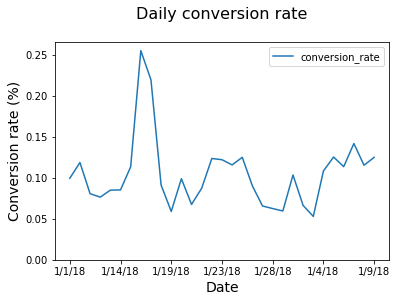

In [17]:
# Create a line chart using daily_conversion_rate
daily_conversion_rate.plot('date_served','conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

### Marketing channels across age groups

Some marketing stakeholders want to know if their marketing channels are reaching all users equally or if some marketing channels are serving specific age demographics.

Within a marketing team, it is common to get requests that require quick analysis and visualization. The better you are at visualizing the results, the more likely that you will effectively communicate your findings to your stakeholders.

In this exercise, you will create a grouped bar chart showing how many people each marketing channel reached by age group.

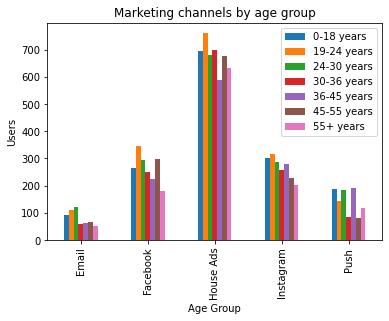

In [18]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

### Grouping and counting by multiple columns

Stakeholders have begun competing to see whose channel had the best retention rate from the campaign. You must first determine how many subscribers came from the campaign and how many of those subscribers have stayed on the service.

It's important to identify how each marketing channel is performing because this will affect company strategy going forward. If one channel is outperforming others, it might signal the channel merits further investment.

You will build on what we have learned about .groupby() in previous exercises, this time grouping by multiple columns.

In [19]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_total.head())

date_subscribed  subscribing_channel
1/1/18           Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [21]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained']==True].groupby(['date_subscribed', 
                                       'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
1/1/18           Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


### Analyzing retention rates for the campaign

Now that you've calculated the total subscribers and retained subscribers, you can settle the question of which channel had the highest retention rate.

In this exercise, you will calculate the retention rate for each subscription channel and visualize your results.

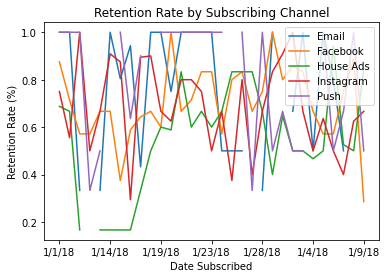

In [22]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='upper right',
            labels=retention_rate_df.columns.values)
plt.show()